# EDA CASE STUDY


## PROBLEM STATEMENT : predict the loan defaulter customer from the retail  company data.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### loading data

In [2]:
data=pd.read_csv("loan.csv")

C:\Users\MANSI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Understanding
      

In [4]:
data.shape

(39717, 111)

### We get to know that it is avery big dataset. It have 111 columns.We analyse data on some specific columns.

### Missing values

In [5]:
null_values=[(x,data[x].isnull().mean()*100) for x in data]
null_df=pd.DataFrame(null_values,columns=['column_name','percentage'])
null_df

,column_name,percentage
0,id,0.000000
1,member_id,0.000000
2,loan_amnt,0.000000
3,funded_amnt,0.000000
4,funded_amnt_inv,0.000000
...,...,...
106,tax_liens,0.098195
107,tot_hi_cred_lim,100.000000
108,total_bal_ex_mort,100.000000
109,total_bc_limit,100.000000


In [6]:
drop_cols=list(null_df[null_df['percentage']>50]['column_name'])
drop_cols



['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',


### there are 57 columns in which missing value are greater than 50% .We drop these columns.

In [7]:
data.drop(drop_cols,axis=1,inplace=True)

### unique values in columns 

In [8]:
unique=data.nunique()
unique=unique[unique.values == 1]
data.drop(labels = list(unique.index), axis =1,inplace=True)




In [9]:
# No need of this columns

drop_column = ["id","member_id","url","zip_code"]
data.drop(labels = drop_column, axis =1, inplace=True)
print(data.shape ,"rows & columns.")

(39717, 41) rows & columns.


### Modifying these columns 

In [10]:
###interest rate column
data['int_rate']=(data['int_rate'].str.strip('%').astype(float))

In [11]:
##convert these columns into numerical
num_col = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']
data[num_col] = data[num_col].apply(pd.to_numeric)


# univariate analysis

In [12]:
need_columns=['loan_amnt','funded_amnt','int_rate','home_ownership','annual_inc','loan_status','purpose']

### loan Purpose 

In [13]:
data.groupby('purpose')['purpose'].count()

purpose
car                    1549
credit_card            5130
debt_consolidation    18641
educational             325
home_improvement       2976
house                   381
major_purchase         2187
medical                 693
moving                  583
other                  3993
renewable_energy        103
small_business         1828
vacation                381
wedding                 947
Name: purpose, dtype: int64

In [14]:
#Loan purpose 
(data.purpose.value_counts()*100)/len(data)

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
house                  0.959287
vacation               0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

In [15]:
# Purpose of loan : Drop records where values are less than 0.95

del_loan_purpose = (data.purpose.value_counts()*100)/len(data)
del_loan_purpose=del_loan_purpose[(del_loan_purpose < 0.95) | (del_loan_purpose.index == 'other')]
del_loan_purpose

other               10.053629
educational          0.818289
renewable_energy     0.259335
Name: purpose, dtype: float64

In [16]:
data.drop(labels = data[data.purpose.isin(del_loan_purpose.index)].index, inplace=True)

In [17]:
print(data.purpose.unique())

['credit_card' 'car' 'small_business' 'wedding' 'debt_consolidation'
 'home_improvement' 'major_purchase' 'medical' 'moving' 'vacation' 'house']


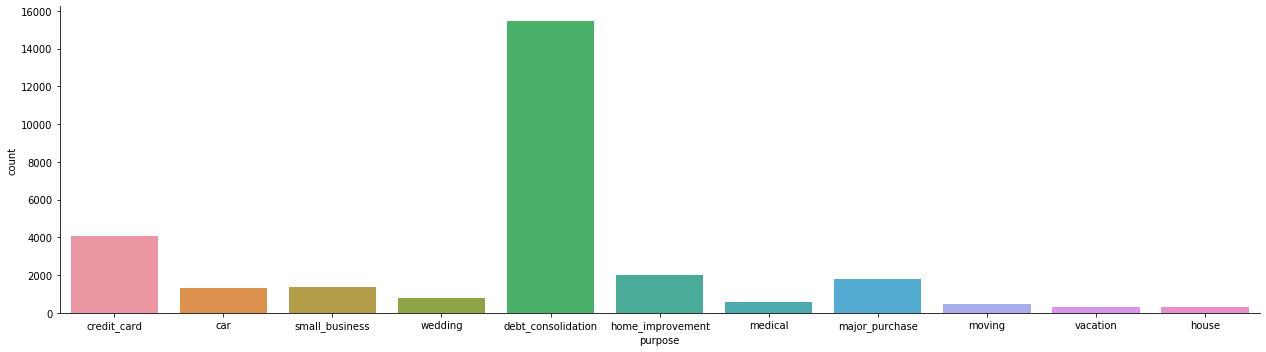

In [94]:
sns.catplot(x="purpose", kind="count", data=data,height=5, aspect=3.5)



### around 16000 people take loan for debt_consolidation

## COUNT LOAN STATUS

In [23]:
##count_loan status
data.loan_status.value_counts()*100/len(data)


Fully Paid     82.874233
Charged Off    14.339682
Current         2.786085
Name: loan_status, dtype: float64

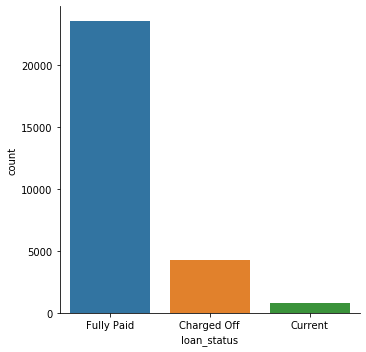

In [30]:
sns.catplot(x="loan_status", kind="count", data=data)

## Insights: From above graph  2% customer chrged_off from the distribution.

# loan amount analysis

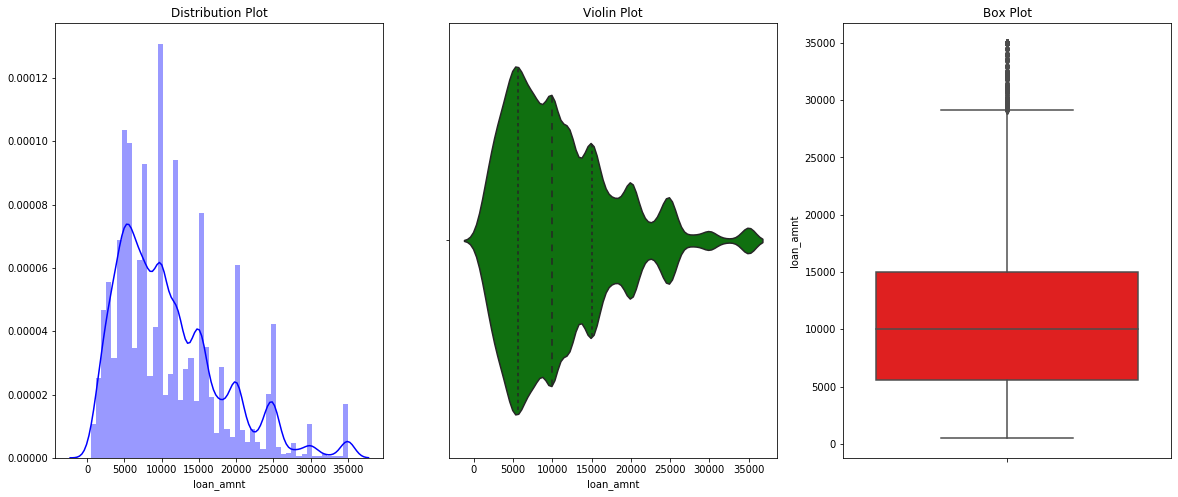

In [24]:
## plotting loan amount 
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(data['loan_amnt'],ax=ax[0],color='blue')
ax[1].set_title("Violin Plot")
sns.violinplot(data=data,x='loan_amnt',ax=ax[1],inner='quartile',color='green')
ax[2].set_title("Box Plot")
sns.boxplot(data=data,x='loan_amnt',ax=ax[2],orient='v',color='red')

### from above following plots we came to know that 75% of the loan amount lie between 5000-15000

# anual income

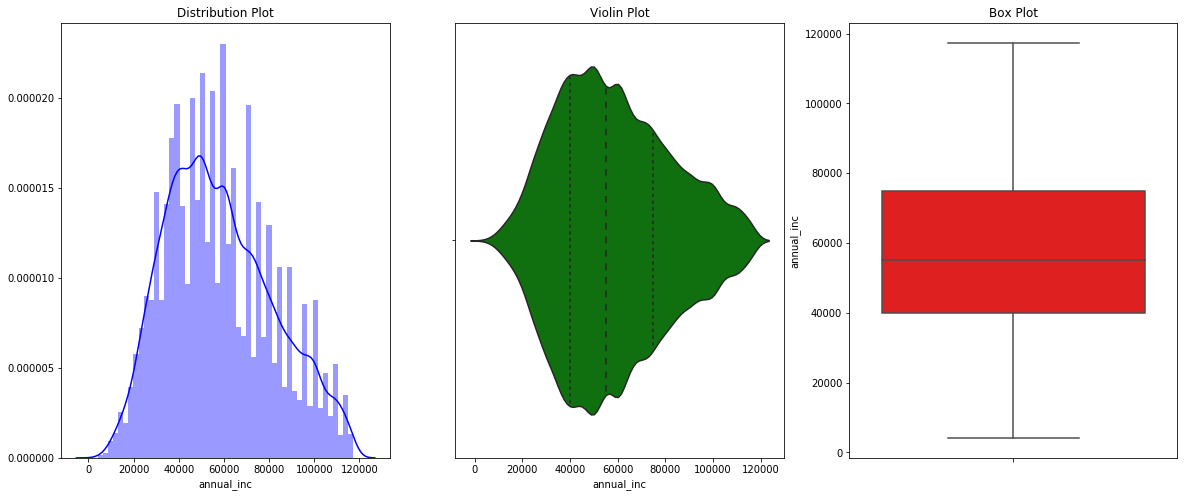

In [25]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(data['annual_inc'],ax=ax[0],color='blue')
ax[1].set_title("Violin Plot")
sns.violinplot(data=data,x='annual_inc',ax=ax[1],inner='quartile',color='green')
ax[2].set_title("Box Plot")
sns.boxplot(data=data,x='annual_inc',ax=ax[2],orient='v',color='red')

### There are so many outliers in anual income 

### Remove outliers

In [26]:
qua = data["annual_inc"].quantile(0.90)
data= data[data["annual_inc"] < qua]
data['annual_inc'].describe()

count    28580.000000
mean     53148.181370
std      19140.700419
min       4080.000000
25%      38400.000000
50%      52000.000000
75%      68000.000000
max      92904.000000
Name: annual_inc, dtype: float64

### Plot anual_income 

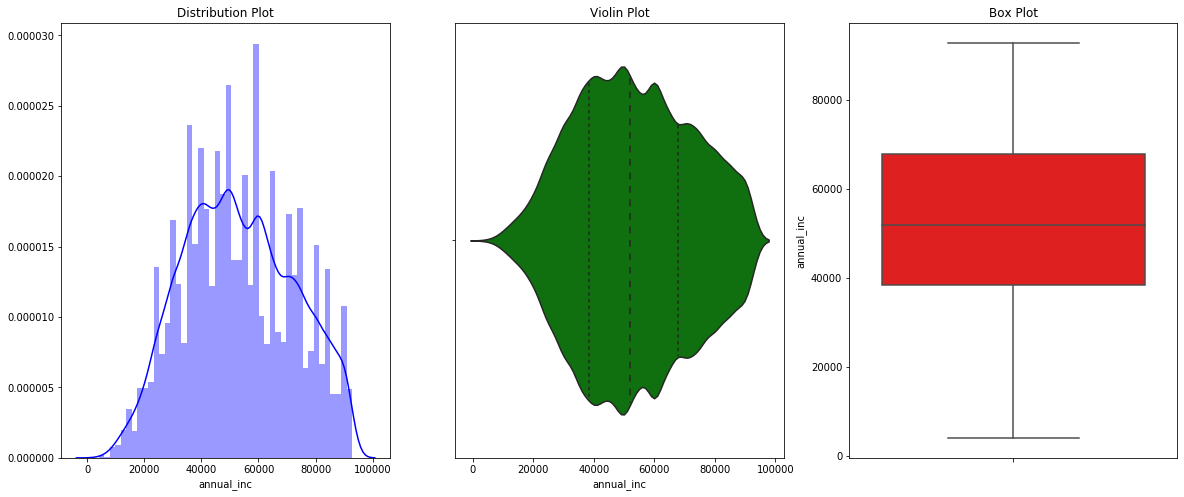

In [27]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(data['annual_inc'],ax=ax[0],color='blue')
ax[1].set_title("Violin Plot")
sns.violinplot(data=data,x='annual_inc',ax=ax[1],inner='quartile',color='green')
ax[2].set_title("Box Plot")
sns.boxplot(data=data,x='annual_inc',ax=ax[2],orient='v',color='red')

### Around 75% of the data have anual income between 40000 - 78000 anually.

## Bivariate analysis

### Analysis between purpose and loan status .

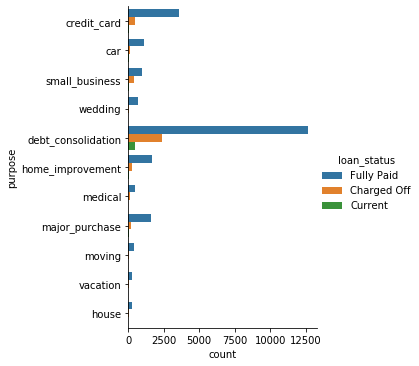

In [37]:
sns.catplot(y="purpose", hue="loan_status", kind="count",
            data=data)

## approx 85% of the applicants applied loan for paying their debt_consolidations.

# home_ownership vs loan_status

In [38]:
data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [42]:
# Remove rows where home_ownership'=='OTHER', 'NONE', 'ANY'
rem = ['OTHER', 'NONE']
data.drop(data[data['home_ownership'].isin(rem)].index,inplace=True)
data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

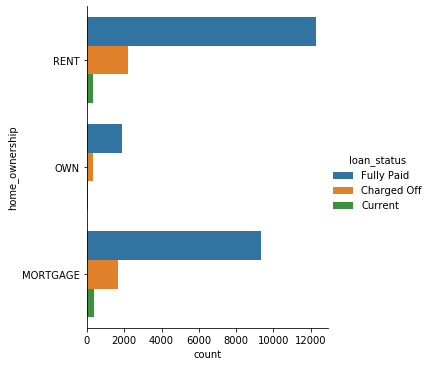

In [44]:
sns.catplot(y='home_ownership', hue="loan_status", kind="count",data=data)

## 33% rent customers are fully paid lenders

# loan_status vs term

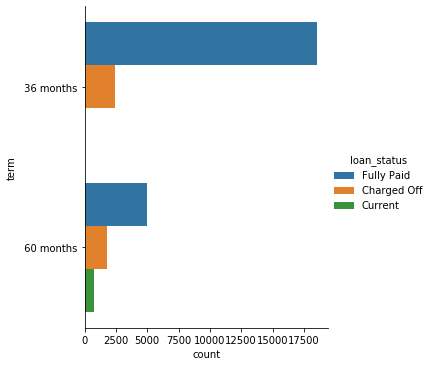

In [45]:
sns.catplot(y='term', hue="loan_status", kind="count",data=data)

### 68% customers fully paid  the loan in the term period of 36months

## loan_status vs verification_status

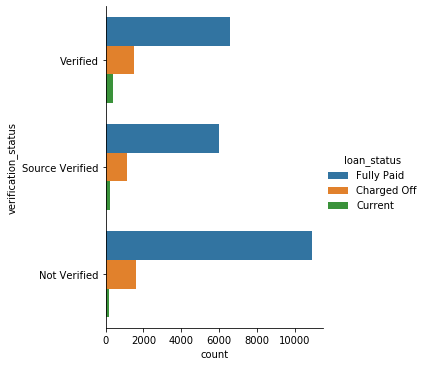

In [46]:
sns.catplot(y='verification_status', hue="loan_status", kind="count",data=data)

### around 62%  people are not verified and fully paid their loan 

# data vs loan amount

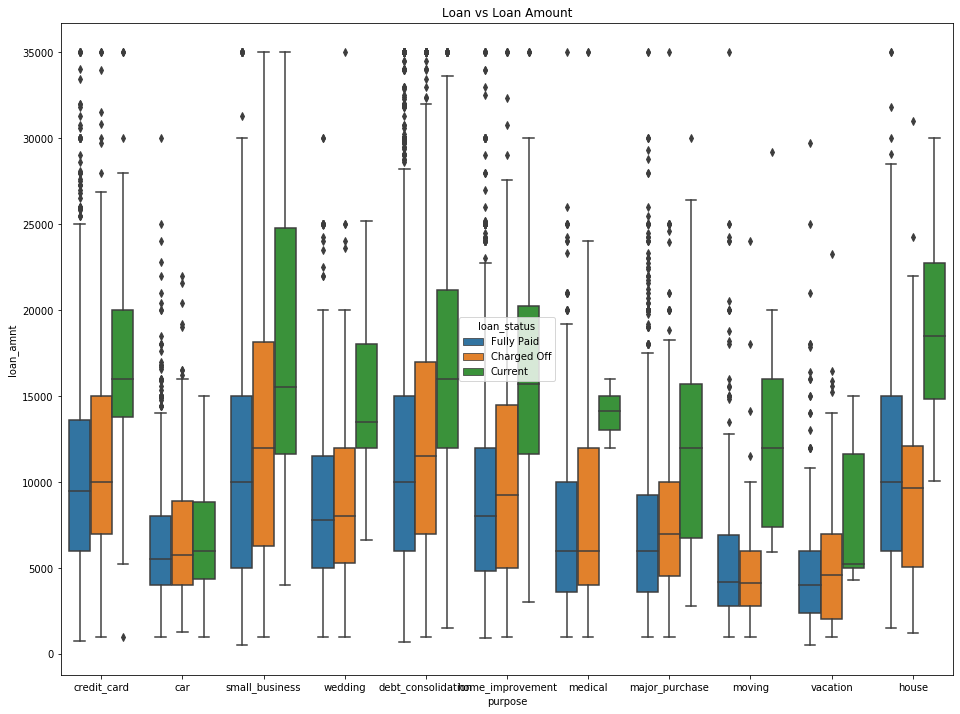

In [100]:
plt.figure(figsize=(16,12))
sns.boxplot(data =data, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Loan vs Loan Amount')
plt.show()


max amount of  loan taken  by small buisnesses

max loan is fully paid by debt consolidations




# loan correlation

In [48]:
loan_correlation = data.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1.000000,0.981331,0.936689,0.287093,0.925389,0.382162,0.120169,-0.047244,-0.003094,0.145625,...,0.192941,0.866257,0.832516,0.825606,0.720267,0.034637,0.137827,0.067069,0.422065,-0.035406
funded_amnt,0.981331,1.000000,0.955094,0.293209,0.951603,0.378305,0.118996,-0.045836,-0.001387,0.142583,...,0.196052,0.883374,0.849440,0.843725,0.729635,0.038106,0.140300,0.069935,0.426388,-0.036217
funded_amnt_inv,0.936689,0.955094,1.000000,0.287072,0.895308,0.360964,0.125314,-0.050590,-0.015510,0.131588,...,0.205057,0.862068,0.895691,0.819554,0.723807,0.017141,0.131950,0.061894,0.417830,-0.040114
int_rate,0.287093,0.293209,0.287072,1.000000,0.263963,0.054851,0.098760,0.144783,0.136946,-0.020601,...,0.127195,0.279417,0.275169,0.152844,0.519208,0.088594,0.129355,0.066298,0.133530,0.088720
installment,0.925389,0.951603,0.895308,0.263963,1.000000,0.375052,0.103942,-0.033100,0.000345,0.136606,...,0.123886,0.837021,0.794018,0.826366,0.621332,0.046374,0.120023,0.069173,0.372288,-0.032276
annual_inc,0.382162,0.378305,0.360964,0.054851,0.375052,1.000000,-0.026874,0.020016,0.032902,0.246495,...,0.053427,0.350729,0.337042,0.352210,0.249810,-0.003509,0.028829,0.006275,0.191479,0.012566
dti,0.120169,0.118996,0.125314,0.098760,0.103942,-0.026874,1.000000,-0.035016,0.003813,0.302534,...,0.047384,0.115400,0.120377,0.094033,0.136978,-0.011731,0.027932,0.013862,0.036776,0.000098
delinq_2yrs,-0.047244,-0.045836,-0.050590,0.144783,-0.033100,0.020016,-0.035016,1.000000,0.008503,0.013265,...,-0.007655,-0.038502,-0.043952,-0.052178,0.005185,0.029993,0.012700,0.012116,-0.019509,0.008268
inq_last_6mths,-0.003094,-0.001387,-0.015510,0.136946,0.000345,0.032902,0.003813,0.008503,1.000000,0.091088,...,-0.004989,-0.023068,-0.031859,-0.036701,0.016252,0.027111,0.013950,0.007090,0.018837,0.018474
open_acc,0.145625,0.142583,0.131588,-0.020601,0.136606,0.246495,0.302534,0.013265,0.091088,1.000000,...,0.018789,0.126583,0.118364,0.127454,0.088430,-0.018208,0.013707,0.003778,0.067872,0.014693


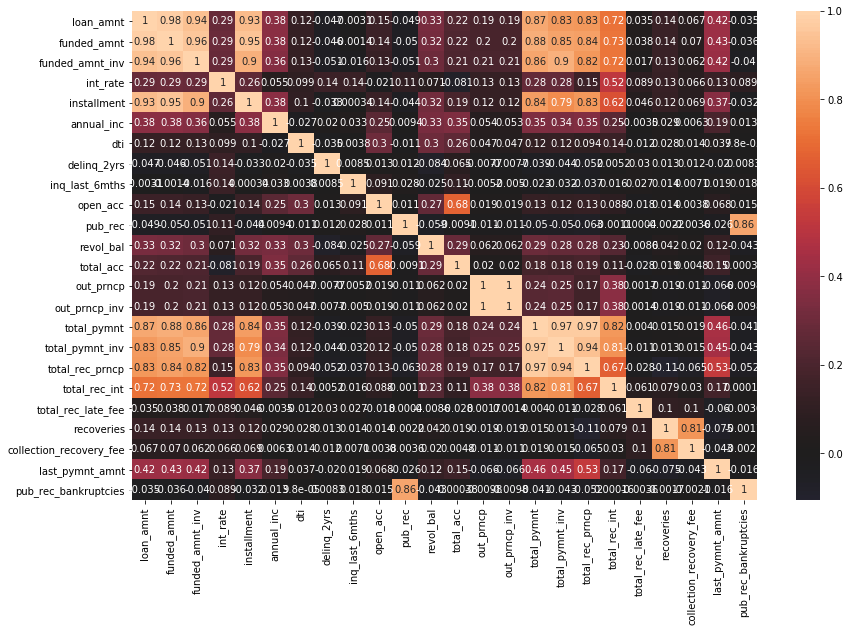

In [56]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True,center=0)
plt.show()